#Twitter Sentiment Analysis with TextBlob(NLTK)

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/IFAO/nlp/twitt.png" width="1000">

In [1]:
!pip install tweepy --quiet

#se si ha a disposizione caricare il proprio file config.py

In [ ]:
ls

config.py  sample_data/


<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/IFAO/nlp/scrap.png" width="700">

### TextBlob 
TextBlob aims to provide access to common text-processing operations through a familiar interface. You can treat TextBlob objects as if they were Python strings that learned how to do Natural Language Processing.

In [2]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [3]:
from textblob import TextBlob
import nltk
nltk.download('punkt')

text = TextBlob("Simple is better than complex.")
text.tags

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[('Simple', 'NN'),
 ('is', 'VBZ'),
 ('better', 'JJR'),
 ('than', 'IN'),
 ('complex', 'JJ')]

In [4]:
text.sentiment

Sentiment(polarity=0.06666666666666667, subjectivity=0.41904761904761906)

In [5]:
text.sentiment.polarity

0.06666666666666667

In [6]:
neg = TextBlob("I hate you")
neg.sentiment.polarity

-0.8

### Registrarsi a Twitter e richiedere API

In [ ]:
# %%writefile config.py

# TWITTER_CONSUMER_KEY = "dsfdfsfdsfsdfdsfdsfdsfdsf"
# TWITTER_CONSUMER_SECRET = "dfdsfdsfdsfdsfdsfdsfdfdsfdsfdsfdsfdsfdsf"
# TWITTER_ACCESS_TOKEN = "3432r32r3r32rgf34f4r43f33fdd4ff43ffffffffff4d4dddd4dd3"
# TWITTER_ACCESS_TOKEN_SECRET = "43r34f4f4d4rdr43rs3sd4fs4ffffd4444444fsf44fdsfdf4"

In [7]:
from config import TWITTER_CONSUMER_KEY,TWITTER_CONSUMER_SECRET,TWITTER_ACCESS_TOKEN,TWITTER_ACCESS_TOKEN_SECRET

In [8]:
from  textblob import TextBlob
import tweepy
from tweepy import Stream
from tweepy import StreamListener
import json
import re
import csv

In [9]:
auth = tweepy.OAuthHandler(TWITTER_CONSUMER_KEY, TWITTER_CONSUMER_SECRET)
auth.set_access_token(TWITTER_ACCESS_TOKEN, TWITTER_ACCESS_TOKEN_SECRET)
api = tweepy.API(auth)
twittes = api.home_timeline()

## Impostare le due keywords su cui basare la sentiment analisys
Queste poi saranno le stringhe di ricerca nei tweet di twitter

In [10]:
one_str = 'Esg'
two_str = 'Carbon'

## Biden Vs Trump

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/IFAO/nlp/bidtru.gif" width="1000">

In [11]:
one = 0
two = 0

header_name = [one_str, two_str]
with open('sentiment.csv', 'w') as file:
    writer = csv.DictWriter(file, fieldnames=header_name)
    writer.writeheader()

class Listener(StreamListener):
    
    def on_data(self, data):
        raw_twitts = json.loads(data)
        try:
            tweets = raw_twitts['text']
            
            tweets = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweets).split())
            tweets = ' '.join(re.sub('RT',' ', tweets).split())
            
            blob = TextBlob(tweets.strip())
            
            global one
            global two
            
            one_sentiment = 0
            two_sentiment = 0
            
            for sent in blob.sentences:
                if one_str in sent and two_str not in sent:
                    one_sentiment = one_sentiment + sent.sentiment.polarity
                else:
                    two_sentiment = two_sentiment + sent.sentiment.polarity
            
            one = one + one_sentiment
            two = two + two_sentiment
            
            with open('sentiment.csv', 'a') as file:
                writer = csv.DictWriter(file, fieldnames=header_name)
                info = {
                    one_str: one,
                    two_str: two
                }
                writer.writerow(info)
            
            print(tweets)
            print()
        except:
            print('Error got')
        
    def on_error(self, status):
        print(status)

### Ready? Go!

In [12]:
twitter_stream = Stream(auth, Listener())
twitter_stream.filter(track = [one_str,two_str])

Carbon capture and storage where should the world store CO It s a moral dilemma

2021 DESAFIO ACEITE Webinar Voluntariado de compet ncias O certificado B Corp

In this role you will originate and develop business with implementation partners locally and globally focusing o

With European natural gas prices at exorbitant levels coal plants will be burning coal through the winter They are buying

Trucks in the US create 339 million metric tons of carbon dioxide every year What an insightful spotlight on the work

Like science Like soils Like doing fieldwork in spectacular places and working with brilliant people Well here you go

n allah ona benzerler ocuklar m in allah sana benzemezler in allah ona benzer ocuklar m Elini pmemekte hakl

Carbon offsets for aviation are a false climate solution InternationalCivilAviationDay Case study in English and Sp

We are waiting on ports road and rail infrastructure green hydrogen carbon capture a national

And if you want to take that further The en

KeyboardInterrupt: ignored

In [13]:
from itertools import count
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import rc
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
from matplotlib import animation

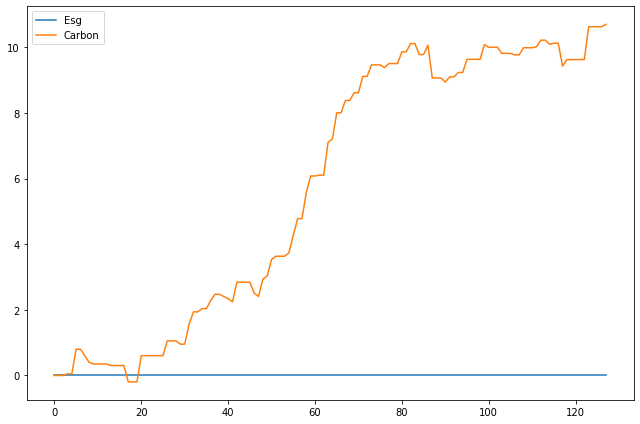

In [14]:
frame_len = 20000

fig = plt.figure(figsize=(9,6))

def animate(i):
    data = pd.read_csv('sentiment.csv')
    y1 = data[one_str]
    y2 = data[two_str]

    if len(y1)<=frame_len:
        plt.cla()
        plt.plot(y1, label=one_str)
        plt.plot(y2, label=two_str)
    else:
        plt.cla()
        plt.plot(y1[-frame_len: ], label=one_str)
        plt.plot(y2[-frame_len: ], label=two_str)
    
    plt.legend(loc='upper left')
    plt.tight_layout()


ani = FuncAnimation(plt.gcf(), animate, interval=1000)

# Note: below is the part which makes it works on Colab
rc('animation', html='jshtml')
ani;

## Final Countdown!

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/IFAO/nlp/biden.jpg" width="1400">